<h1 style = "text-align:center; font-size:300%">Home Loan Approval Prediction</h1>

---

# About Problem


#### Problem Statement:

About Company\
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

#### Problem
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.



---

#### Dataset Link: https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

---

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')

import warnings 
warnings.filterwarnings('ignore')

# Loading & Inspecting Data

In [2]:
# Loading dataset
data = pd.read_csv('Loan_Data.csv')

In [3]:
# Show the first 10 rows
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Dependents,0,1,0,0,0,2,0,3+,2,1
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0


In [4]:
# Getting information about each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


---

# Data Cleansing

## 1. Columns Names

In [5]:
# Delete all spaces before and after the column name 
data.columns = [col.replace(' ', '') for col in data.columns]

In [6]:
print(f'The names of columns: {data.columns}')

The names of columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


## 2. Unnecessary Columns

In [7]:
# Dropping the Loan_ID column
data.drop(['Loan_ID'], axis=1, inplace=True)

## 3. Missing Values

In [8]:
# Check the sum of missing values for each column
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

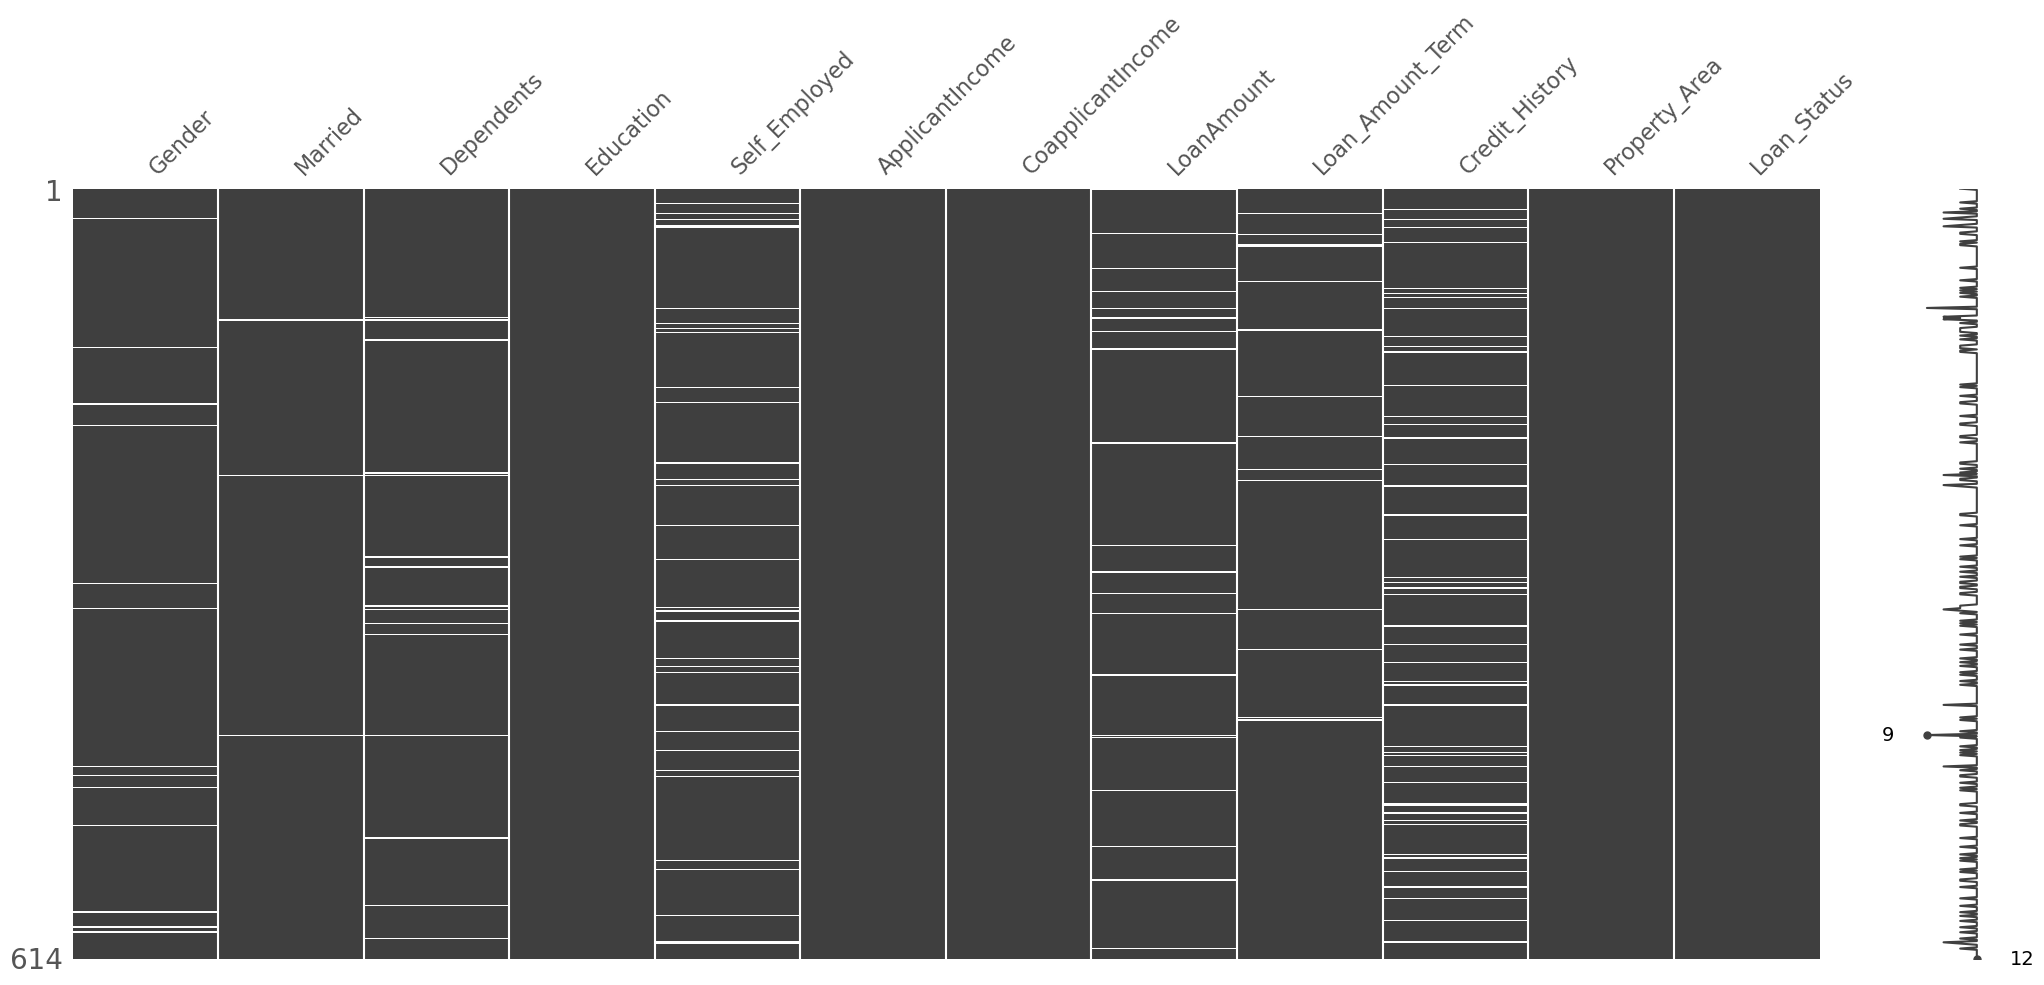

In [9]:
msno.matrix(data)
plt.show()

> The null values are missing randomly, and this good. 

**Let's see the distribution of `LoanAmount` and `Loan_Amount_Term` columns:**

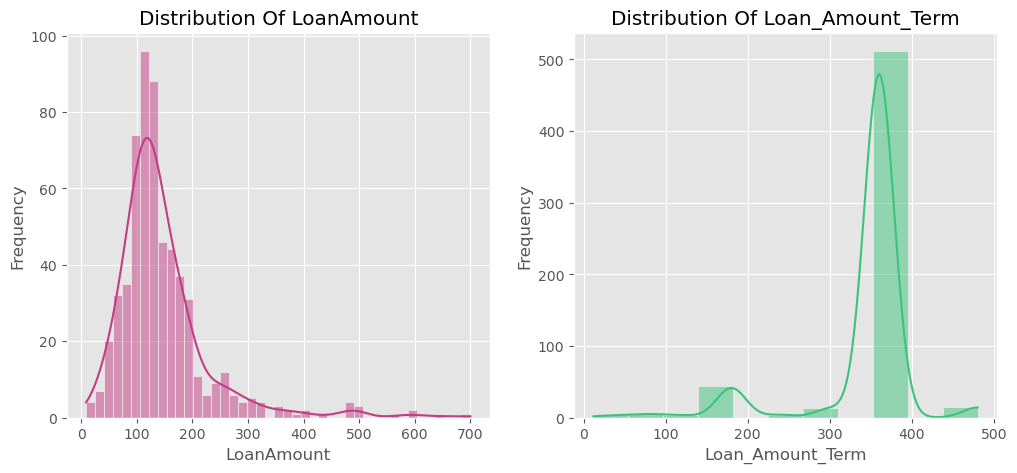

In [10]:
color = ['#C33C84', '#3CC37B']
plt.figure(figsize = (12, 5))
for i, col in enumerate(['LoanAmount', 'Loan_Amount_Term']):
    plt.subplot(1, 2, i+1)
    sns.histplot(data, x = col, kde = True, color = color[i])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution Of {col}')
plt.show()

> `LoanAmount` and `Loan_Amount_Term` are not normally distributed, so the median will be better than the mean.

In [11]:
# Filling NaN values in a LoanAmount column using the median
median_LoanAmount = data['LoanAmount'].median()
data['LoanAmount'] = data['LoanAmount'].fillna(median_LoanAmount)

In [12]:
# Filling NaN values in a Loan_Amount_Term column using the median
median_Loan_Amount_Term = data['Loan_Amount_Term'].median()
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(median_Loan_Amount_Term)

Let's fill NaN values in `Gender`, `Married`, `Dependents`, `Self_Employed`, and `Credit_History` using the most frequent value (mode): 

In [13]:
# Filling NaN values in Credit_History column using the most frequent value (mode)
mode_Gender = data['Gender'].mode()[0]
data['Gender'] = data['Gender'].fillna(mode_Gender)

In [14]:
# Filling NaN values in Self_Employed column using the most frequent value (mode)
mode_Married = data['Married'].mode()[0]
data['Married'] = data['Married'].fillna(mode_Married)

In [15]:
# Filling NaN values in Dependents column using the most frequent value (mode)
mode_Dependents = data['Dependents'].mode()[0]
data['Dependents'] = data['Dependents'].fillna(mode_Dependents)

In [16]:
# Filling NaN values in Married column using the most frequent value (mode)
mode_Self_Employed = data['Self_Employed'].mode()[0]
data['Self_Employed'] = data['Self_Employed'].fillna(mode_Self_Employed)

In [17]:
# Filling NaN values in Credit_History column using the most frequent value (mode)
mode_Credit_History = data['Credit_History'].mode()[0]
data['Credit_History'] = data['Credit_History'].fillna(mode_Credit_History)

In [18]:
# Check missing values again
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

> All missing values have been replaced.

## 4. Duplicate Values

In [19]:
# Check Duplicate Values
data.duplicated().sum()

0

> The dataset doesn't have any duplicate values.

## 5. Bad Data

In [20]:
# Show unique values of the Dependents column
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [21]:
# Update values of the Dependents column using the map method
data['Dependents'] = data['Dependents'].map({'0': 'Zero', '1': 'One', '2': 'Two', '3+': 'Three or more'})

In [22]:
# Show unique values of the Dependents column after updating
data['Dependents'].unique()

array(['Zero', 'One', 'Two', 'Three or more'], dtype=object)

---

In [23]:
# Show unique values of the Credit_History column
data['Credit_History'].unique()

array([1., 0.])

In [24]:
# Update values of the Credit_History column using the map method
data['Credit_History'] = data['Credit_History'].map({1.0: 'Yes', 0.0: 'No'})

In [25]:
# Show unique values of the Credit_History column after updating
data['Credit_History'].unique()

array(['Yes', 'No'], dtype=object)

---

In [26]:
# Show unique values of the Credit_History column
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [27]:
# Update values of the Credit_History column using the map method
data['Loan_Status'] = data['Loan_Status'].map({'Y': 'Yes', 'N': 'No'})

In [28]:
# Show unique values of the Credit_History column after updating
data['Loan_Status'].unique()

array(['Yes', 'No'], dtype=object)

## 6. Outliers

In [29]:
print(f' The number of samples before removing outliers: {data.shape[0]}')

 The number of samples before removing outliers: 614


In [30]:
# Creating a list including the names of numerical data
num_features = data.select_dtypes(include='number').columns.tolist()

print(f'Numerical Features: {num_features}')

Numerical Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


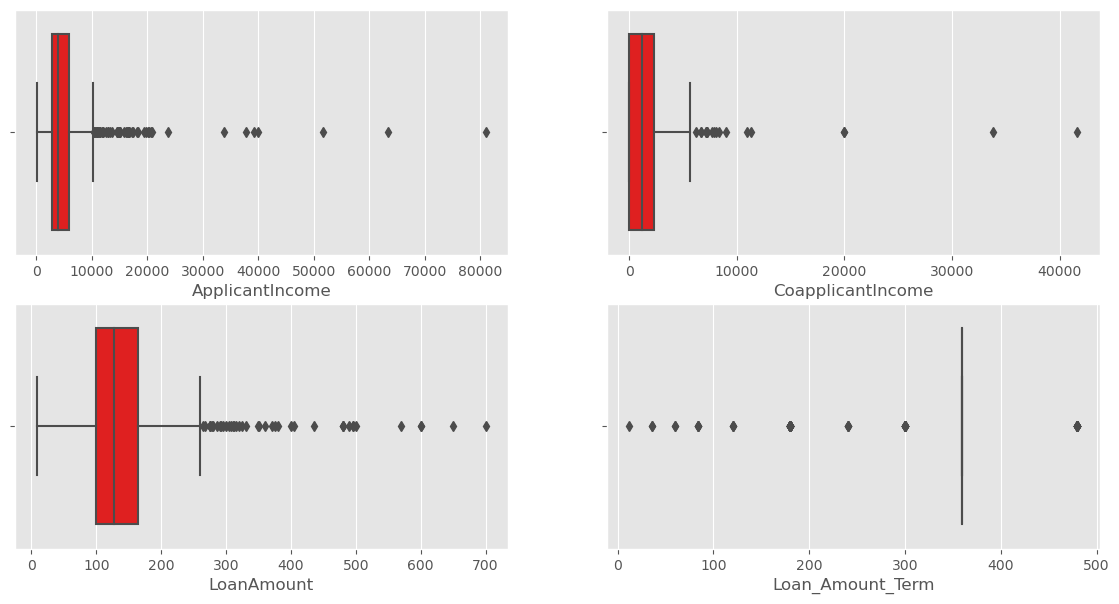

In [31]:
# check the outliers
plt.figure(figsize=(14,7))
for i,v in enumerate(num_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data = data, x = v, color = 'red')
plt.show()

In [32]:
# Remove outliers for Applicant Income
data.drop(data[data['ApplicantIncome'] > 20000].index, axis = 0, inplace = True)

# Remove outliers for Co-applicant Income
data.drop(data[data['CoapplicantIncome'] > 8000].index, axis = 0, inplace = True)

# Remove outliers for Loan Amount Term
data.drop(data[data['Loan_Amount_Term'] < 60].index, axis = 0, inplace = True)

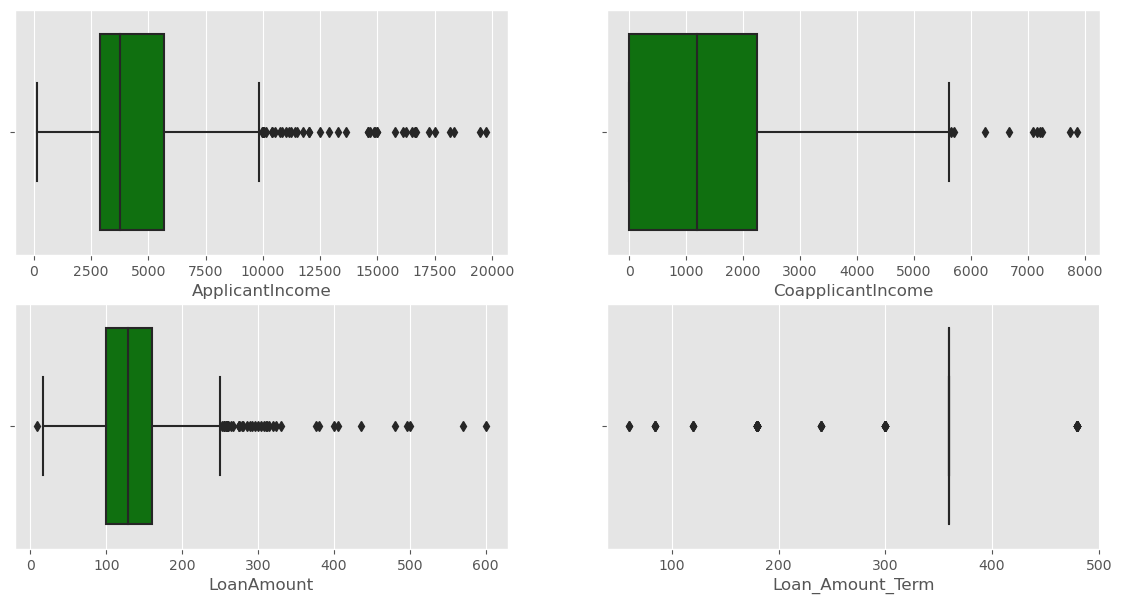

In [33]:
# check the outliers after removing some of it
plt.figure(figsize=(14,7))
for i,v in enumerate(num_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data = data, x = v, color = 'green')
plt.show()

In [34]:
print(f' The number of samples after removing outliers: {data.shape[0]}')

 The number of samples after removing outliers: 590


## 7. Saving Data

In [35]:
# Save to CSV
data.to_csv('Modified_Loan_Data.csv', index=False)

---

# See You In The Next Notebook